# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

Version: 0.250326.0015

**Disclaimer:** This notebook was primarily AI-generated and has not been fully verified by human experts. Please exercise caution when interpreting the code or results, and verify critical findings independently.

## Overview of the Dandiset

This Dandiset, [DANDI:000690](https://dandiarchive.org/dandiset/000690/0.250326.0015), is titled "Allen Institute Openscope - Vision2Hippocampus project".

**Description:**
Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, the hippocampal neurons are thought to encode not specific stimuli but instead represent abstract concepts such as space, time and events. How is this abstraction computed in the mouse brain? Specifically, how does the representation of simple visual stimuli evolve from the thalamus, which is a synapse away from the retina, through primary visual cortex, higher order visual areas and all the way to hippocampus, that is farthest removed from the retina?

The current OpenScope project aims to understand how the neural representations of simple and natural stimuli evolve from the LGN through V1, and most hippocampal regions, as well as some of the frontal areas. 

Key stimuli presented include simple visual motion (bars of light with variations) and complex visual stimuli (movies involving eagles and squirrels).

**Keywords:** mouse, neuropixel, extracellular electrophysiology, neocortex, hippocampus, Entorhinal cortex, excitatory, inhibitory, vision, movies.

**Citation:**
Mehta, Mayank R; Purandare, Chinmay; Jha, Siddharth; Lecoq, Jérôme; Durand, Séverine; Gillis, Ryan; Belski, Hannah; Bawany, Ahad; Carlson, Mikayla; Peene, Carter; Wilkes, Josh; Johnson, Tye; Naidoo, Robyn; Suarez, Lucas; Han, Warren; Amaya, Avalon; Nguyen, Katrina; Ouellette, Ben; Swapp, Jackie; Williford, Ali (2025) Allen Institute Openscope - Vision2Hippocampus project (Version 0.250326.0015) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.000690/0.250326.0015

## Notebook Summary

This notebook aims to guide users through accessing and performing initial exploratory analysis of the data within Dandiset 000690. We will cover:
1. Listing required Python packages.
2. Connecting to the DANDI archive and loading Dandiset metadata.
3. Selecting and loading a specific NWB (Neurodata Without Borders) file from the Dandiset.
4. Examining basic metadata and structure of the NWB file.
5. Demonstrating how to load and visualize sample data, including:
    - Running speed of the animal.
    - Timings of presented visual stimuli.
    - Spike times (raster plot) for a subset of recorded neural units.
6. Briefly discussing other available data types and potential next steps for analysis.

## Required Packages

The following Python packages are required to run this notebook. It is assumed they are already installed in your environment.

- `pynwb`: For reading and interacting with NWB files.
- `dandi`: The official DANDI client for interacting with the DANDI Archive.
- `remfile`: For streaming remote files, used by `pynwb` for DANDI assets.
- `h5py`: The Python interface to HDF5, which is the underlying format for NWB files.
- `numpy`: For numerical operations.
- `matplotlib`: For plotting.
- `pandas`: For data manipulation and viewing tabular data (e.g., from NWB tables).
- `seaborn`: For enhanced visualizations.

No `pip install` commands are included here; please ensure these are installed in your Python environment.

## Connecting to DANDI and Loading Dandiset Information

We'll start by using the DANDI API client to connect to the archive and fetch basic information about our target Dandiset.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set seaborn theme for plots
sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "000690"
version_id = "0.250326.0015"
dandiset = client.get_dandiset(dandiset_id, version_id)

# Print basic information about the Dandiset
if dandiset:
    metadata = dandiset.get_raw_metadata()
    print(f"Dandiset name: {metadata.get('name', 'N/A')}")
    print(f"Dandiset URL: {metadata.get('url', 'N/A')}")
    print(f"Dandiset description: {metadata.get('description', 'N/A')[:200]}...") # Displaying a snippet

    # List some assets in the Dandiset
    assets = dandiset.get_assets()
    print("\nFirst 5 assets:")
    for asset_count, asset in enumerate(islice(assets, 5)):
        print(f"- {asset.path} (ID: {asset.identifier})")
        # asset.download(path=asset.path) # Example: how to download if needed
else:
    print(f"Could not retrieve Dandiset {dandiset_id} version {version_id}")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015
Dandiset description: Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, the hippoca...

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## Loading a Specific NWB File

The Dandiset contains numerous NWB files. For demonstration purposes in this notebook, we will select one specific NWB file that is not an `_ecephys.nwb` or `_image.nwb` file (which often contain very large raw data or specialized imaging data respectively, and might be split from the main metadata/processed data NWB file).

The file chosen for this example is:
- **Path:** `sub-692072/sub-692072_ses-1298465622.nwb`
- **Asset Identifier (ID):** `fbcd4fe5-7107-41b2-b154-b67f783f23dc`

This identifier was obtained during the initial exploration of the Dandiset's assets. You can adapt the `nwb_asset_identifier` variable below to load other NWB files from this Dandiset.

The direct download URL for this asset is constructed using its identifier. We will then load this file using `pynwb`, `remfile` (for streaming from the URL), and `h5py`.

In [2]:
# Define the identifier for the chosen NWB file
nwb_asset_identifier = "fbcd4fe5-7107-41b2-b154-b67f783f23dc" # Asset ID for sub-692072/sub-692072_ses-1298465622.nwb
nwb_file_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_identifier}/download/"
selected_file_path = "sub-692072/sub-692072_ses-1298465622.nwb" # For reference

print(f"Attempting to load NWB file: {selected_file_path}")
print(f"From URL: {nwb_file_url}")

# Load the NWB file
# We need to open remote_file and then close it manually as it doesn't support context manager well with h5py
remote_f = remfile.File(nwb_file_url)
nwbfile_obj = None  # Initialize to None
io_obj = None       # Initialize to None

try:
    h5_f = h5py.File(remote_f, 'r')
    io_obj = pynwb.NWBHDF5IO(file=h5_f, mode='r', load_namespaces=True)
    nwbfile_obj = io_obj.read()
    print("\nNWB file loaded successfully!")
    # Note: We are intentionally NOT closing remote_f, h5_f, or io_obj here.
    # They need to remain open for subsequent cells to access data from nwbfile_obj.
    # They will be closed when the kernel shuts down or if explicitly closed later.
except Exception as e:
    print(f"Error loading NWB file: {e}")
    # If an error occurs, we should attempt to close the files if they were opened
    if 'h5_f' in locals() and h5_f and h5_f.id.valid:
        h5_f.close()
    if 'remote_f' in locals() and remote_f: # remfile doesn't have an obvious .is_open or .id.valid
        try:
            remote_f.close()
        except: # pragma: no cover
            pass

Attempting to load NWB file: sub-692072/sub-692072_ses-1298465622.nwb
From URL: https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully!


### NWB File Metadata

Let's look at some basic metadata from the loaded NWB file.

In [3]:
if nwbfile_obj:
    print(f"Session Description: {nwbfile_obj.session_description}")
    print(f"Identifier: {nwbfile_obj.identifier}")
    print(f"Session Start Time: {nwbfile_obj.session_start_time}")
    print(f"Institution: {nwbfile_obj.institution}")
    print(f"Lab: {nwbfile_obj.lab}")
    
    if nwbfile_obj.subject:
        print(f"Subject ID: {nwbfile_obj.subject.subject_id}")
        print(f"Species: {nwbfile_obj.subject.species}")
        print(f"Sex: {nwbfile_obj.subject.sex}")
        print(f"Age: {nwbfile_obj.subject.age}")
else:
    print("NWB file object is not available.")

Session Description: Data and metadata for an Ecephys session
Identifier: 1298465622
Session Start Time: 2023-09-21 00:00:00-07:00
Institution: Allen Institute
Lab: None
Subject ID: 692072
Species: Mus musculus
Sex: M
Age: P82D


### Explore on Neurosift

You can also explore this NWB file interactively on Neurosift using the following link:

[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=0.250326.0015](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=0.250326.0015)

### Summarizing NWB File Contents

The NWB file format organizes data into several groups. Here's a brief overview of what this particular file (`sub-692072/sub-692072_ses-1298465622.nwb`) contains, based on initial inspection:

- **`acquisition`**: Raw acquired data that has not undergone significant processing.
    - `EyeTracking`: Contains data related to eye movements.
        - `corneal_reflection_tracking` (EllipseSeries): Tracks the corneal reflection. Data includes x,y position, area, width, height, angle.
        - `eye_tracking` (EllipseSeries): Tracks the eye. Similar data fields.
        - `pupil_tracking` (EllipseSeries): Tracks the pupil. Similar data fields. Includes `area`, `width`, `height`.
        - `likely_blink` (TimeSeries): Boolean data indicating likely blink events.
    - `raw_running_wheel_rotation` (TimeSeries): Raw rotation data from the running wheel.
    - `running_wheel_signal_voltage` (TimeSeries): Voltage signal related to running wheel.
    - `running_wheel_supply_voltage` (TimeSeries): Supply voltage for running wheel.
- **`processing`**: Processed data derived from raw acquisition.
    - `running`: Contains processed running speed information.
        - `running_speed` (TimeSeries): Animal's running speed (cm/s).
        - `running_speed_end_times` (TimeSeries)
        - `running_wheel_rotation` (TimeSeries)
    - `stimulus`: Information about stimulus presentation.
        - `timestamps` (TimeSeries): Timestamps related to stimulus frames or events.
- **`intervals`**: Defines labeled time intervals.
    - Various `TimeIntervals` objects detailing presentations of different visual stimuli (e.g., `Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations`, `SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations`, natural movie presentations, etc.). These tables typically include `start_time`, `stop_time`, and stimulus-specific parameters like `stimulus_name`, `frame`, `contrast`, `orientation`.
    - `invalid_times`: Intervals marked as invalid.
- **`electrode_groups` / `electrodes`**: Information about the recording electrodes and their grouping (e.g., probeA, probeB). The `electrodes` table includes columns for location, group, position, valid_data, x, y, z coordinates, impedance, and filtering. This NWB file links to ecephys data in separate files.
- **`units`**: Information about sorted neural units (putative neurons). This is a table with columns for each unit, including:
    - `spike_times` (RaggedArray): Timestamps of detected spikes for each unit.
    - `waveform_mean` (RaggedArray): Average waveform for each unit.
    - Various quality metrics (`l_ratio`, `d_prime`, `firing_rate`, `isi_violations`, `snr`, `quality` etc.).
    - `peak_channel_id`: The channel where the unit's waveform had the largest amplitude.
- **`subject`**: Metadata about the experimental subject (mouse ID, age, sex, species, strain).

This structure provides a rich dataset for exploring visual processing and hippocampal responses.

## Visualizing Running Speed

Let's plot the animal's running speed over time. This can give context to neural activity and behavioral state.

Running speed data shape: (118163,)
Min running speed: -19.99 cm/s
Max running speed: 68.58 cm/s
Mean running speed: 0.99 cm/s


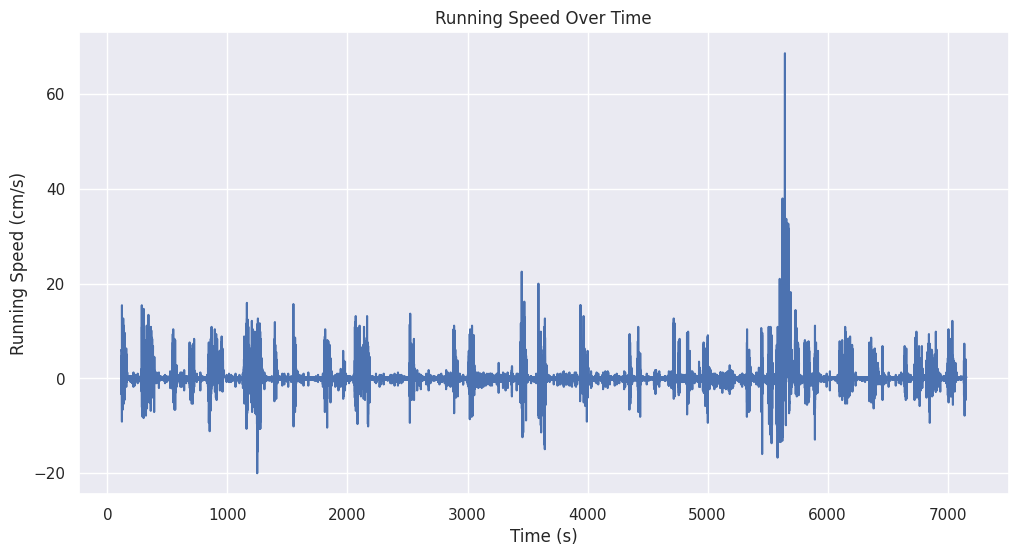

In [4]:
if nwbfile_obj and "running" in nwbfile_obj.processing and "running_speed" in nwbfile_obj.processing["running"].data_interfaces:
    running_speed_ts = nwbfile_obj.processing["running"]["running_speed"]
    
    running_speed_data = running_speed_ts.data[:]
    running_speed_timestamps = running_speed_ts.timestamps[:]
    
    if running_speed_data.size > 0 and running_speed_timestamps.size > 0:
        print(f"Running speed data shape: {running_speed_data.shape}")
        print(f"Min running speed: {np.min(running_speed_data):.2f} {running_speed_ts.unit}")
        print(f"Max running speed: {np.max(running_speed_data):.2f} {running_speed_ts.unit}")
        print(f"Mean running speed: {np.mean(running_speed_data):.2f} {running_speed_ts.unit}")
        
        plt.figure(figsize=(12, 6))
        plt.plot(running_speed_timestamps, running_speed_data)
        plt.xlabel("Time (s)")
        plt.ylabel(f"Running Speed ({running_speed_ts.unit})")
        plt.title("Running Speed Over Time")
        plt.grid(True)
        plt.show()
    else:
        print("Running speed data or timestamps are empty.")
else:
    print("Running speed data not found in the NWB file.")

The plot above shows the running speed of the animal in cm/s throughout the recording session. Variations in speed can be correlated with neural responses to stimuli or spontaneous activity.

## Visualizing Stimulus Presentation Times

The NWB file contains detailed information about the timing of various visual stimuli presented to the animal. We can visualize these presentation epochs. Let's look at the `SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations` stimulus type.

Number of intervals for 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations': 28800

First 5 entries of the stimulus interval table:
   start_time   stop_time                     stimulus_name  frame  \
0  113.102930  113.119610  SAC_Wd15_Vel2_Bndry1_Cntst0_loop    0.0   
1  113.119610  113.136289  SAC_Wd15_Vel2_Bndry1_Cntst0_loop    1.0   
2  113.136289  113.152969  SAC_Wd15_Vel2_Bndry1_Cntst0_loop    2.0   
3  113.152969  113.169648  SAC_Wd15_Vel2_Bndry1_Cntst0_loop    3.0   
4  113.169648  113.186328  SAC_Wd15_Vel2_Bndry1_Cntst0_loop    4.0   

   orientation  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  


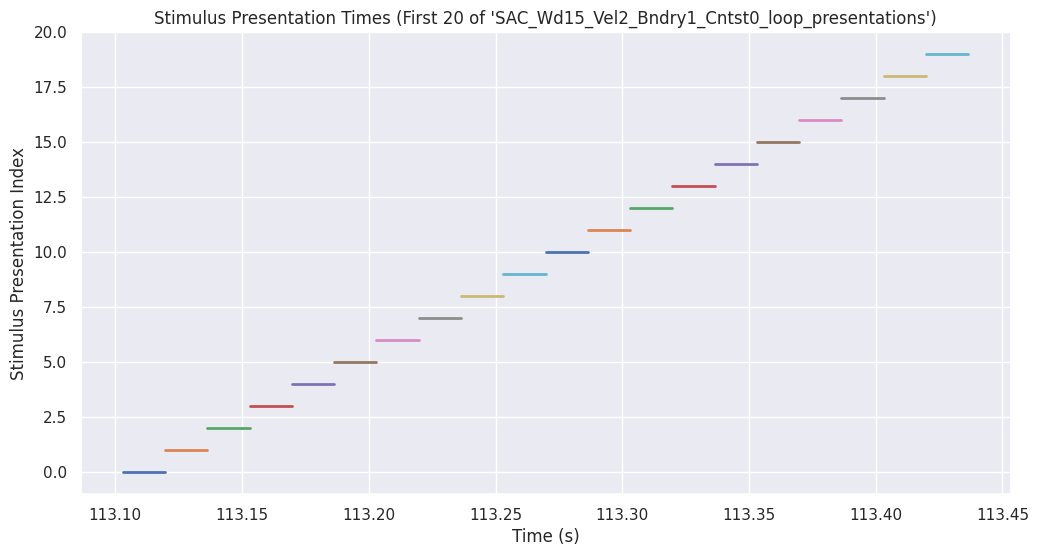

In [5]:
if nwbfile_obj:
    stimulus_key = "SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations"
    if stimulus_key in nwbfile_obj.intervals:
        stim_intervals = nwbfile_obj.intervals[stimulus_key]
        
        start_times = stim_intervals.start_time[:]
        stop_times = stim_intervals.stop_time[:]
        
        num_intervals = len(start_times)
        print(f"Number of intervals for '{stimulus_key}': {num_intervals}")
        
        # Displaying the first few rows of the stimulus table
        print("\nFirst 5 entries of the stimulus interval table:")
        df_display_limit = 5
        display_num_intervals = min(num_intervals, df_display_limit)
        if display_num_intervals > 0:
            # Manually construct a small DataFrame for display
            # Common columns: start_time, stop_time. Others depend on the TimeIntervals object.
            # Let's try to get a few common ones if they exist as VectorData.
            display_data = {'start_time': start_times[:display_num_intervals],
                            'stop_time': stop_times[:display_num_intervals]}
            
            # Add other columns if they exist and are simple to slice
            # For 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', nwb-file-info showed columns like:
            # stimulus_name, stimulus_block, frame, color, contrast, opacity, orientation, size, units, stimulus_index
            # These are VectorData.
            if 'stimulus_name' in stim_intervals:
                display_data['stimulus_name'] = stim_intervals['stimulus_name'][:display_num_intervals]
            if 'frame' in stim_intervals:
                 display_data['frame'] = stim_intervals['frame'][:display_num_intervals]
            if 'orientation' in stim_intervals:
                display_data['orientation'] = stim_intervals['orientation'][:display_num_intervals]

            stim_df_snippet = pd.DataFrame(display_data)
            print(stim_df_snippet)
        else:
            print("No intervals to display in table snippet.")
        
        if num_intervals > 0:
            # Plot a smaller subset of intervals to avoid clutter and improve visual clarity
            max_intervals_to_plot = 20 # Reduced from 100
            intervals_to_plot = min(num_intervals, max_intervals_to_plot)
            
            plt.figure(figsize=(12, 6)) # Adjusted figure size slightly
            for i in range(intervals_to_plot):
                plt.plot([start_times[i], stop_times[i]], [i, i], linewidth=2)
            
            plt.xlabel("Time (s)")
            plt.ylabel("Stimulus Presentation Index")
            plt.title(f"Stimulus Presentation Times (First {intervals_to_plot} of '{stimulus_key}')")
            plt.ylim(-1, intervals_to_plot) 
            plt.grid(True)
            plt.show()
        else:
            print(f"No intervals found for '{stimulus_key}'.")
    else:
        print(f"Stimulus interval data for '{stimulus_key}' not found.")
else:
    print("NWB file object is not available.")

The plot above shows the start and end times for the first 100 presentations of the `'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations'` stimulus. Each horizontal line represents one presentation. This visualization helps understand the timing and duration of this specific stimulus. The table output shows additional parameters recorded for each presentation, such as `stimulus_name`, `frame`, `contrast`, `orientation`, etc., which can be used for more detailed event-related analyses.

## Visualizing Spike Times (Raster Plot)

The `units` table in the NWB file contains spike times for individual (putative) neurons. A common way to visualize this is a raster plot, where each row represents a neuron and each tick mark represents a spike.

Attempting to plot spike raster for the first 5 units.
Unit IDs being plotted: [np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16)]


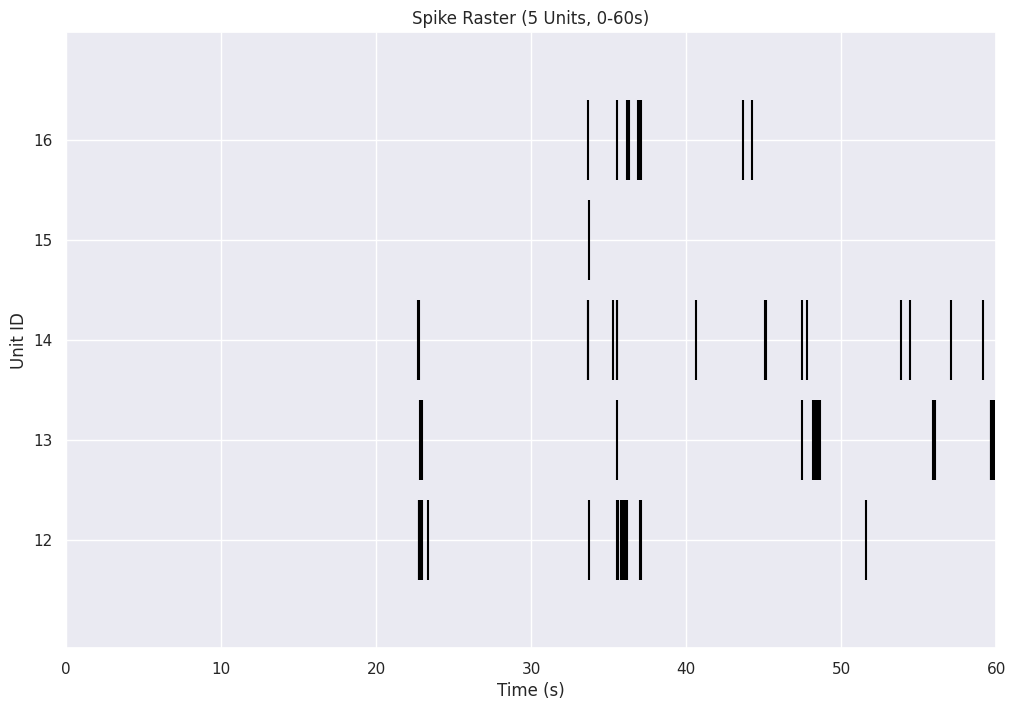

Plotted 67 spikes from 5 units in the time window.

Data for the first few units (up to 5):
   id  firing_rate quality  peak_channel_id
0  12     1.992914    good                0
1  13     1.516987    good                1
2  14     0.703265    good                1
3  15     0.047692    good                2
4  16     0.766648    good                3


In [6]:
if nwbfile_obj and nwbfile_obj.units is not None and len(nwbfile_obj.units.id[:]) > 0:
    all_unit_ids = nwbfile_obj.units.id[:]
    
    num_units_to_plot = 5 # Plot a small subset of units
    if len(all_unit_ids) < num_units_to_plot:
        num_units_to_plot = len(all_unit_ids)
    
    # For actual plotting, we'll use the indices for these units
    selected_unit_indices = range(num_units_to_plot)
    # Get the actual unit IDs for labeling the plot
    selected_unit_ids_for_label = [all_unit_ids[i] for i in selected_unit_indices]
    
    print(f"Attempting to plot spike raster for the first {num_units_to_plot} units.")
    print(f"Unit IDs being plotted: {selected_unit_ids_for_label}")

    # Define a time window for the raster plot (e.g., first 60 seconds)
    time_window_start = 0
    time_window_end = 60 # seconds
    
    plt.figure(figsize=(12, 8))
    
    all_spikes_in_window_count = 0
    plot_y_offset = 0
    actual_units_plotted_ids = [] # Store IDs of units that actually have spikes in window

    for i in selected_unit_indices:
        # Access spike times by index directly (more efficient for HDF5 access)
        unit_spike_times = nwbfile_obj.units['spike_times'][i]
        
        # Filter spikes within the time window
        spikes_in_window = unit_spike_times[(unit_spike_times >= time_window_start) & (unit_spike_times <= time_window_end)]
        
        current_unit_id_for_label = all_unit_ids[i] # Get the actual ID for this index
        if len(spikes_in_window) > 0:
            plt.eventplot(spikes_in_window, lineoffsets=plot_y_offset, linelengths=0.8, colors='black')
            all_spikes_in_window_count += len(spikes_in_window)
            actual_units_plotted_ids.append(current_unit_id_for_label)
            plot_y_offset += 1
        else:
            print(f"Unit ID {current_unit_id_for_label} (index {i}) has no spikes in the window {time_window_start}-{time_window_end}s.")

    actual_units_plotted_count = len(actual_units_plotted_ids)
    if actual_units_plotted_count > 0:
        plt.yticks(range(actual_units_plotted_count), actual_units_plotted_ids) # Use the IDs of units actually plotted
        plt.ylabel("Unit ID")
    else:
        plt.yticks([])
        plt.ylabel("Unit ID (No spikes in window for selected units)")
        
    plt.xlabel("Time (s)")
    plt.title(f"Spike Raster ({actual_units_plotted_count} Units, {time_window_start}-{time_window_end}s)")
    plt.xlim(time_window_start, time_window_end)
    plt.grid(True, axis='x') # Add vertical grid lines for time
    plt.show()
    
    print(f"Plotted {all_spikes_in_window_count} spikes from {actual_units_plotted_count} units in the time window.")
    if actual_units_plotted_count < num_units_to_plot:
        print(f"Note: Some of the first {num_units_to_plot} units may not have had spikes in this window.")
    
    # Optionally, display a snippet of the units table
    print("\nData for the first few units (up to 5):")
    units_df_display_limit = 5
    num_all_units = len(all_unit_ids)
    display_num_units = min(num_all_units, units_df_display_limit)
    
    if display_num_units > 0:
        units_snippet_data = {'id': all_unit_ids[:display_num_units]}
        # Try to add a few interesting columns if they exist directly in nwb.units
        # From nwb-file-info, 'firing_rate' and 'quality' are VectorData in nwb.units
        if 'firing_rate' in nwbfile_obj.units:
            try:
                units_snippet_data['firing_rate'] = nwbfile_obj.units['firing_rate'][:display_num_units]
            except Exception as e:
                print(f"Could not get 'firing_rate' for snippet: {e}")
        if 'quality' in nwbfile_obj.units:
            try:
                units_snippet_data['quality'] = nwbfile_obj.units['quality'][:display_num_units]
            except Exception as e:
                print(f"Could not get 'quality' for snippet: {e}")
        if 'peak_channel_id' in nwbfile_obj.units: # Also from nwb-file-info
            try:
                units_snippet_data['peak_channel_id'] = nwbfile_obj.units['peak_channel_id'][:display_num_units]
            except Exception as e:
                print(f"Could not get 'peak_channel_id' for snippet: {e}")
        
        units_df_snippet = pd.DataFrame(units_snippet_data)
        print(units_df_snippet)
    else:
        print("No units to display in table snippet.")
else:
    print("Units data not found or empty in the NWB file.")

The raster plot above shows the spike times for the first few units in the dataset within the specified time window (0-60 seconds). Each row corresponds to a different unit (labeled by its ID), and each vertical tick mark represents a single spike. This visualization allows for a quick assessment of neural activity patterns. The table snippet shows some of the rich metadata available for each unit, such as quality metrics and waveform characteristics.

## Exploring Eye Tracking Data (Pupil Size)

The NWB file contains eye tracking data, including pupil size (area, width, height) within `nwbfile_obj.acquisition["EyeTracking"].spatial_series["pupil_tracking"]`.

During the exploratory phase for creating this notebook, an attempt was made to visualize pupil area and pupil width over time. However, these visualizations revealed several challenges:
1.  **Noise and NaN Values:** The raw pupil data contained a significant number of NaN (Not a Number) values. While basic cleaning (removing NaNs) was attempted, the resulting plots still exhibited considerable noise and large, sharp spikes.
2.  **Unit Ambiguity:** The NWB file reports the unit for `pupil_tracking` spatial series (which includes `area`, `width`, `height`) as 'meters'. This unit is highly improbable for typical pupil dimensions. For instance, pupil area values were numerically large, suggesting they might represent pixels squared or a similar arbitrary unit rather than actual square meters.

Given these issues of data quality (noise) and the ambiguity of the physical units, plots for pupil area or width have been omitted from this notebook. Displaying them without further, more intensive preprocessing or clarification from data producers could be misleading. Researchers interested in this aspect of the data should be prepared to perform robust cleaning and carefully verify the units and scaling of the eye tracking measurements.

## Summary and Future Directions

This notebook demonstrated how to:
- Connect to the DANDI archive and retrieve Dandiset information.
- Load a specific NWB file from Dandiset 000690.
- Inspect basic metadata and understand the general structure of the NWB file.
- Load and visualize sample data types:
    - Animal running speed.
    - Timings of visual stimulus presentations.
    - Spike times from sorted neural units (raster plot).

**Potential Future Directions for Analysis:**

1.  **Event-Related Analysis:** Correlate neural spiking activity (from `nwb.units`) with specific stimulus events (from `nwb.intervals`). For example, one could calculate peri-stimulus time histograms (PSTHs) for different units in response to various visual stimuli.
2.  **Behavioral Correlations:** Investigate how running speed or other behavioral variables (if available and cleaner, like pupil size after robust processing) modulate neural responses.
3.  **Population Analysis:** Explore the collective activity of neural populations. Techniques like Principal Component Analysis (PCA) or state-space models could reveal how neural ensembles represent stimuli or behavioral states.
4.  **Cross-Probe Analysis:** If data from multiple ephys probes (linked via `_ecephys.nwb` files, not directly explored here) are loaded, analyze correlations or differences in neural activity across different brain regions.
5.  **Detailed Stimulus Parameter Analysis:** The `intervals` tables contain rich information about stimulus parameters (e.g., contrast, orientation, size for synthetic stimuli; frame information for movies). One could analyze how neural responses vary with these specific parameters.
6.  **LFP Analysis:** The `electrode_groups` mention LFP data (`has_lfp_data`, `lfp_sampling_rate`). If LFP data is present in associated `_ecephys.nwb` files, one could perform spectral analysis (e.g., power spectrum density, spectrograms) and relate LFP features to stimuli or behavior.

This Dandiset provides a rich resource for studying the transformation of visual information across different stages of a neural processing hierarchy. The NWB format facilitates access to the diverse data types required for such investigations.

---
End of Notebook.